# Проект. Классификация типов стекла

Данные взяты с сайта kaggle.com.
Ссылка на датасет: https://www.kaggle.com/uciml/glass

Это набор данных по идентификации стекла. Набор содержит 10 атрибутов, включая идентификатор. Результат - тип стекла (7 типов).
Классификация видов стекла нужна для криминологического расследованиия. На месте преступления оставленное стекло может быть использовано в качестве доказательства ... если оно правильно идентифицировано!

Описание атрибутов:
1. Id 1 to 214
2. RI: индекс преломления
3. Na: Натрий (весовой процент вещества в соответствующем оксиде, атрибуты 4-10 аналогичны)
4. Mg: Магний
5. Al: Алюминий
6. Si: Кремний
7. K: Калий
8. Ca: Кальций
9. Ba: Барий
10. Fe: Железо
11. Тип стекла: (1) обработанные окна; (2) окна не обработаны; (3) обработанные окна автомобиля; (4) необработанные окна автомобиля (нет в этой базе); (5) контейнеры; (6) посуда; (7) фары

In [1]:
from sklearn import model_selection, datasets, linear_model, metrics, preprocessing
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data=pd.read_csv("glass.csv",sep=',')
print(data.shape)

(214, 10)


In [5]:
data.sample(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
49,1.51898,13.58,3.35,1.23,72.08,0.59,8.91,0.00,0.00,1
176,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.00,0.00,6
152,1.51779,13.64,3.65,0.65,73.00,0.06,8.93,0.00,0.00,3
72,1.51593,13.09,3.59,1.52,73.10,0.67,7.83,0.00,0.00,2
196,1.51556,13.87,0.00,2.54,73.23,0.14,9.41,0.81,0.01,7


In [6]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Свойства имеют разную размерность (Например, максимумы имеют значения 0.52, 17.38, 75.41). Поэтому данные надо стандартизировать, так как это одно из основных требований для многих методов машинного обучения.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Пропусков в данных нет

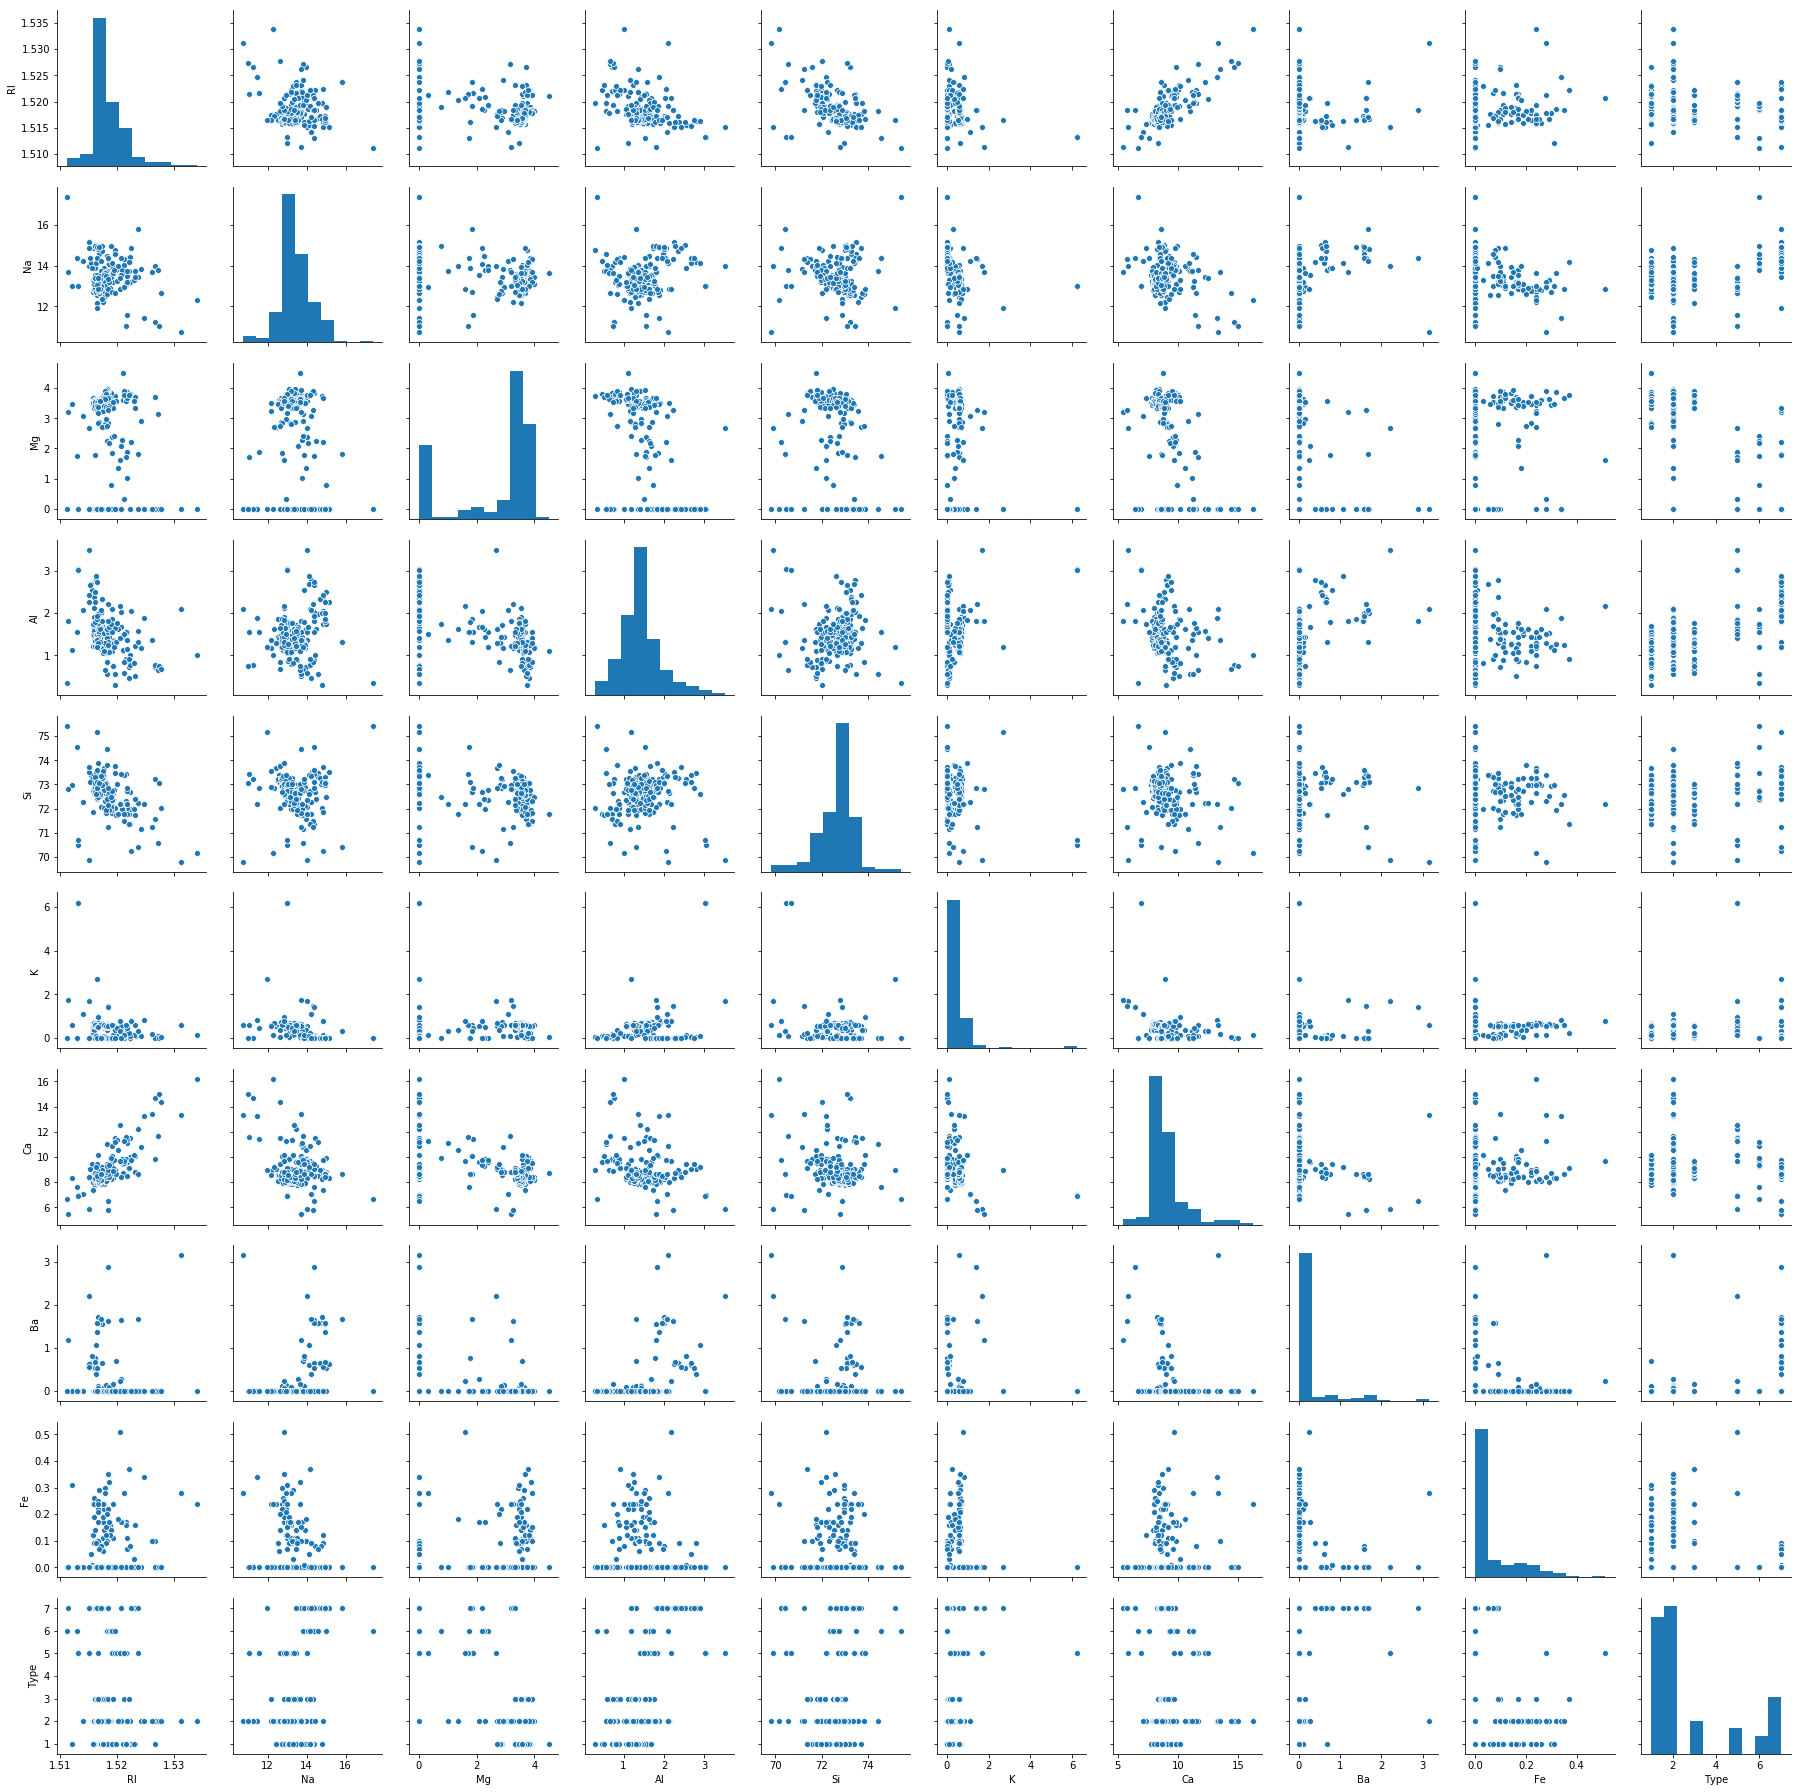

In [8]:
sns.pairplot(data)

На графиках видно, что есть точки которые выделяются среди общей гущи (аномалии, выбросы). Их требуется из данных убрать, чтобы добиться лучшей точности. 

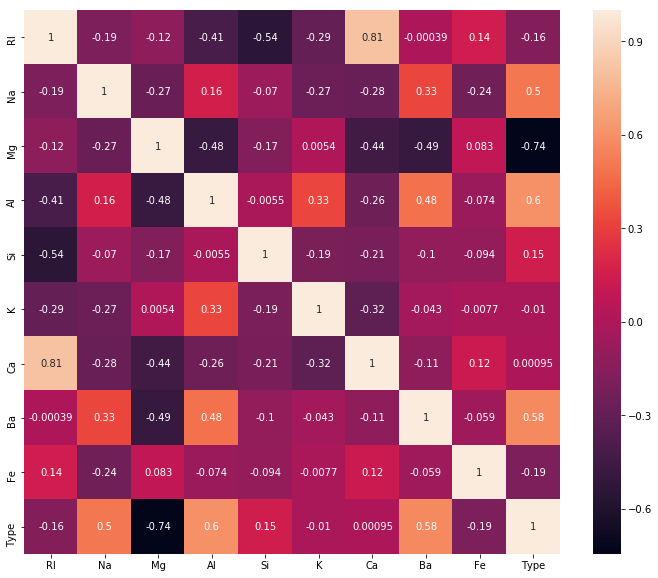

In [9]:
sns.heatmap(data.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(12,10)

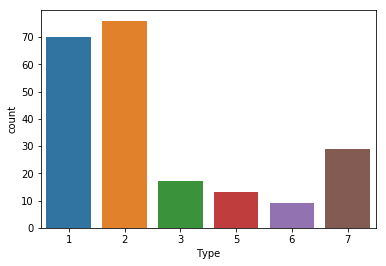

In [10]:
sns.countplot(data["Type"])

Данные не равномерно распределены по классам, это может повлиять на точность моделей.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC

C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Предобработка данных

Очистим данные от аномалий и выбросов. Для этого воспользуемся методом IsolationForest. 

In [12]:
from sklearn.ensemble import IsolationForest

In [13]:
clf=IsolationForest()
clf.fit(data.drop("Type",axis=1).values)
y_pred=clf.predict(data.drop("Type",axis=1).values)

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [14]:
#по полученной маске избавляемся от аномалий и выбросов
data['target']=y_pred
dt=data[data.target>0]
dt=dt.drop('target',axis=1)
print(dt.shape)

(192, 10)


In [15]:
X=dt.drop("Type",axis=1).values
Y=dt["Type"].values

#нормализация и скейлинг параметров
X=preprocessing.normalize(X)
X=preprocessing.scale(X)

# Сравнение моделей

## Линейные модели

In [16]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import StratifiedKFold

In [17]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=0)

В качестве базовой модели попробуем линейную регрессию

In [18]:
cl=OneVsRestClassifier(linear_model.LinearRegression())
cl.fit(x_train,y_train)
cl.score(x_test,y_test)

0.7068965517241379

## K-NN

С помощью поиска параметров по сетке меняем следующие параметры:
* n_neighbors - определяет количество ближайших соседей, которые будут рассмотрены во время определения класса неизвестного объекта
* p - каки способом высчитывать расстояние
* weight - вес соседей. uniform - у всех одинаковый, distance - чем дальше, тем мешьше вес
* algorithm - алгоритм поиска ближайших соседей

In [19]:
param_grid={
    'n_neighbors': np.arange(3, 10),
    'p': [1, 2, 3.5],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn=GridSearchCV(KNeighborsClassifier(),param_grid,cv=4)
knn.fit(X, Y)
print("score: ",knn.best_score_)
print("params: ",knn.best_params_)

score:  0.6875
params:  {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


## Решающее дерево и случайный лес

С помощью поиска параметров по сетке меняем следующие параметры:
* criterion - функция оценки. определяющей качесвто разбиения.
* splitter - стратегия выбора разбиения в каждой вершине
* min_samples_leaf - минимальное количество объектов, требуемое, чтоб объявить вершину листом.
* max_features - количество свойств, рассматриваемых при подборе лучшего разбиения
* class_weight - вес классов.

In [20]:
param={
    'criterion': ['gini', 'entropy'], 
    'splitter': ['best', 'random'],
    'min_samples_leaf':[1,2,3,4],
    'max_features':[9,'auto'],
    'class_weight':['balanced',None]
}
tr=GridSearchCV(DecisionTreeClassifier(random_state=1),param,cv=4)
tr.fit(X, Y)
print("score: ",tr.best_score_)
print("params: ",tr.best_params_)

score:  0.671875
params:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 9, 'min_samples_leaf': 1, 'splitter': 'best'}


Для случайного леса перебираем параметры:
* n_estimators - количество случайных деревьев
* max_depth - максимальная глубина деревьев

In [21]:
param={
    'n_estimators':[15,20,25,30,35],
    'max_depth': list(np.arange(1, 10))
}
rf=GridSearchCV(RandomForestClassifier(random_state=1),param,cv=4)
rf.fit(X,Y)
print("score: ",rf.best_score_)
print("params: ",rf.best_params_)

score:  0.71875
params:  {'max_depth': 6, 'n_estimators': 35}


# Итог

* OneVsRest with LinearRegression: 0.6896551724137931
* K-NN: 0.703125
* DecisionTree: 0.671875
* RandomForest: 0.7291666666666666

# Нейронные сети

In [22]:
from sklearn.neural_network import MLPClassifier

In [53]:
estimator_clas = MLPClassifier(random_state=1,
                        early_stopping=True,
                        validation_fraction=0.2)
param ={
    'hidden_layer_sizes':[(9),(9,9),(9,9,9)],
    'solver':['lbfgs'],
    'activation':['tanh','relu','logistic'],
    'max_iter':[50,100,150,300]
}

classificator = GridSearchCV(estimator=estimator_clas, param_grid=param, cv=3)
classificator.fit(X,Y)
print("score: ", classificator.best_score_)
print("params: ",classificator.best_params_)

score:  0.65625
params:  {'activation': 'logistic', 'hidden_layer_sizes': 9, 'max_iter': 50, 'solver': 'lbfgs'}
